This is a medical Insurance cost prediction

**Work FLow**

Insurance dataset -> Data pre-processing -> Data Analysis -> Data Visualization -> Train test split -> Linear Regression Model

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

Data collection and processing

In [2]:
insurance_data = pd.read_csv("insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [5]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3},'smoker':{'yes':0,'no':1},'sex':{'male':0,'female':1}},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15280\2676424648.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3},'smoker':{'yes':0,'no':1},'sex':{'male':0,'female':1}},inplace=True)


In [10]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [11]:
insurance_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Figure size 600x600 with 0 Axes>

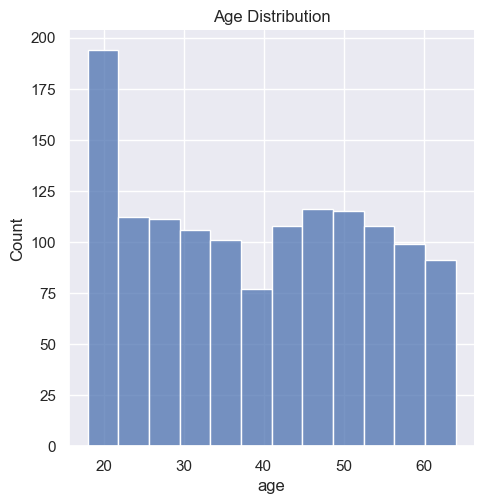

In [13]:
#distribution of age data
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

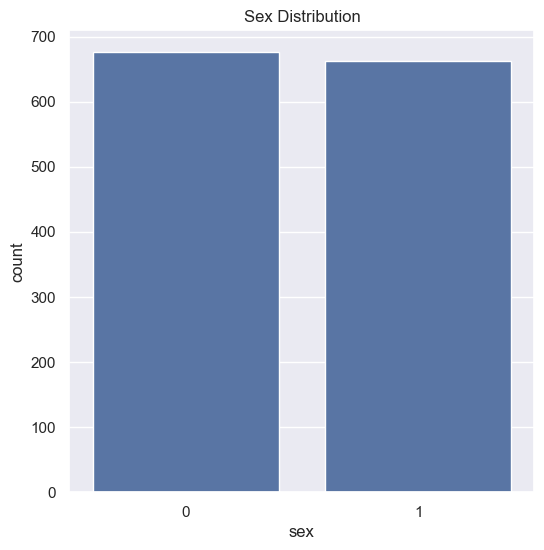

In [14]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data =insurance_data)
plt.title("Sex Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

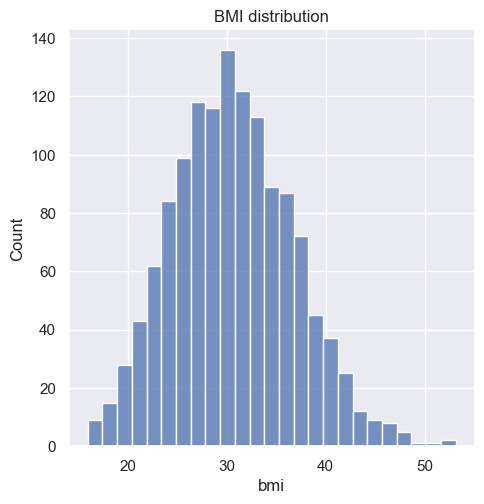

In [15]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title("BMI distribution")
plt.show()

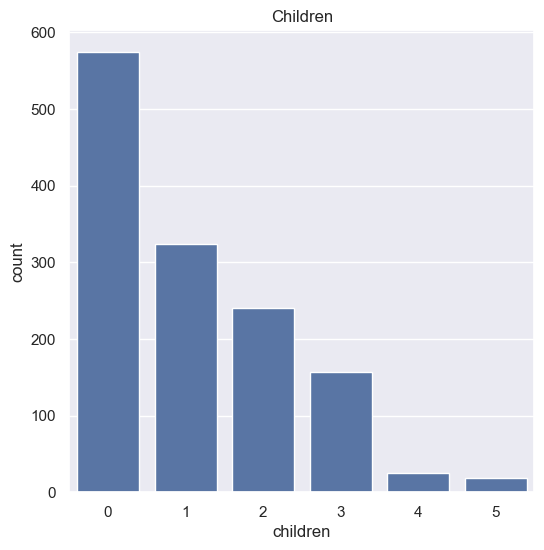

In [17]:
#children count
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children')
plt.show()

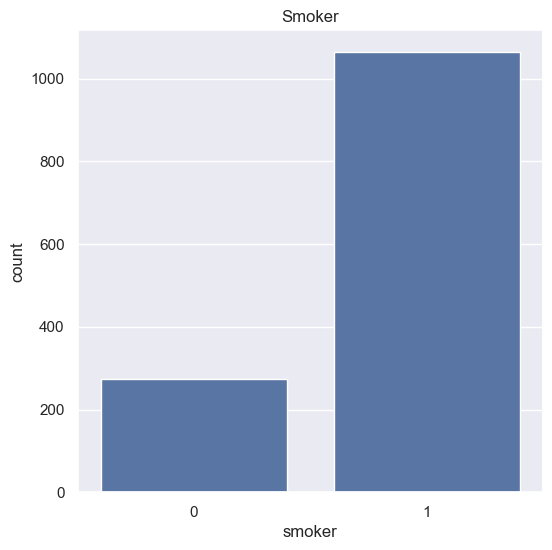

In [18]:
#smoker count
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')
plt.show()

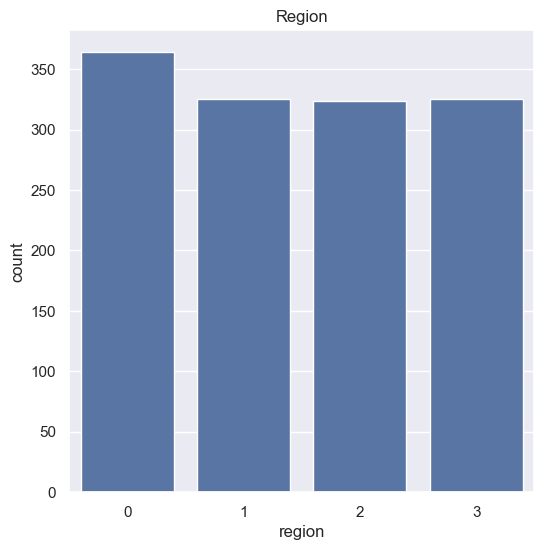

In [19]:
#region count
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

<Figure size 600x600 with 0 Axes>

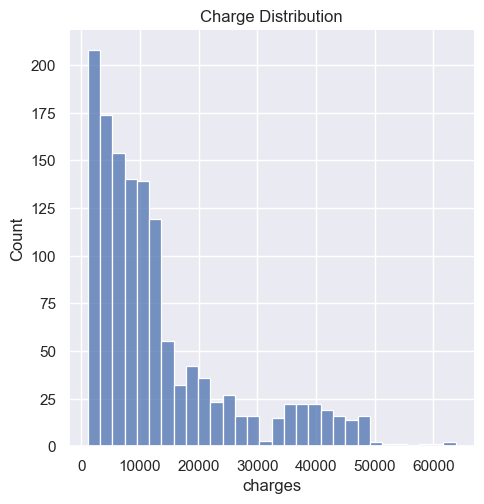

In [20]:
#distributioon of charge vales
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title('Charge Distribution')
plt.show()

Split the Features and Labels

In [21]:
X = insurance_data.drop(columns='charges',axis=1)
Y = insurance_data['charges']

In [22]:
X


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [23]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Train-Test split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [25]:
X_train.shape

(1070, 6)

Training the Model

In [26]:
model =LinearRegression()

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [28]:
X_train_predict = model.predict(X_train)
X_train_error = metrics.r2_score(Y_train,X_train_predict)
print("The training error is ,",X_train_error)

X_test_predict = model.predict(X_test)
X_test_error = metrics.r2_score(Y_test,X_test_predict)
print("The testing error is ,",X_test_error)

The training error is , 0.7472945022920751
The testing error is , 0.761829435021468


Build a predictive System

In [32]:
input_data =(31,1,25.74,0,1,0)
input_data_np =np.asanyarray(input_data)
input_data_reshape =input_data_np.reshape(1,-1)
prediction = model.predict(input_data_reshape)

print(f"The prediction by the model for {input_data} is {prediction[0]}")

The prediction by the model for (31, 1, 25.74, 0, 1, 0) is 3981.5281496905845


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
